170498071/170498071 [==============================] - 4s 0us/step


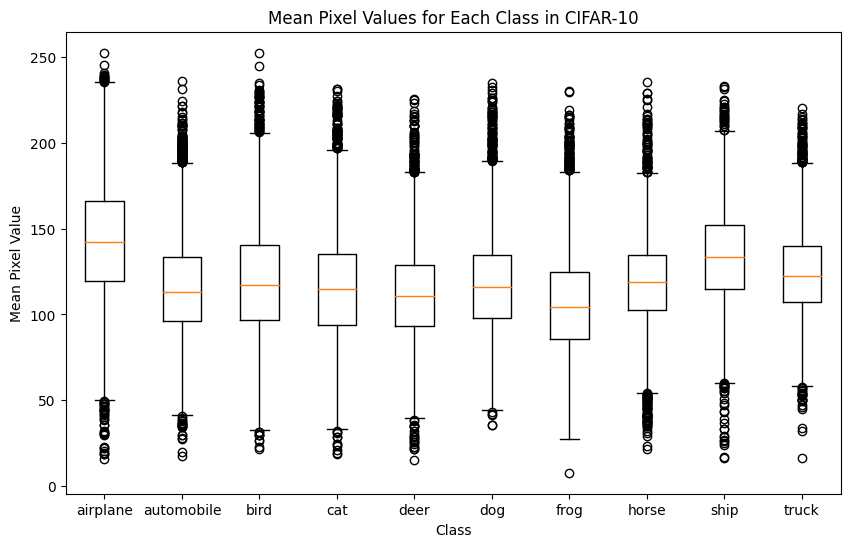

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(train_images, train_labels), (_, _) = tf.keras.datasets.cifar10.load_data()

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize data using box plots
def visualize_data(data, labels, title):
    plt.figure(figsize=(10, 6))
    plt.boxplot([data[labels == i].mean(axis=(1, 2, 3)) for i in range(10)], labels=class_names)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Mean Pixel Value')
    plt.show()

# Visualize mean pixel values for each class
visualize_data(train_images, train_labels.flatten(), title='Mean Pixel Values for Each Class in CIFAR-10')


Mean Squared Error: 8.0326


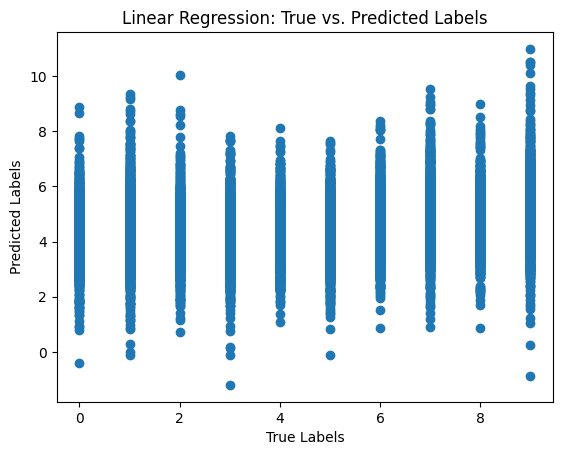

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Flatten images
train_images_flatten = train_images.reshape(train_images.shape[0], -1)
test_images_flatten = test_images.reshape(test_images.shape[0], -1)

# Take only one channel (assuming images are color)
train_images_flatten = train_images.reshape(train_images.shape[0], -1)
test_images_flatten = test_images.reshape(test_images.shape[0], -1)

# Standardize data
scaler = StandardScaler()
train_images_flatten_scaled = scaler.fit_transform(train_images_flatten)
test_images_flatten_scaled = scaler.transform(test_images_flatten)

# Linear Regression Model
linear_reg_model = LinearRegression()
linear_reg_model.fit(train_images_flatten_scaled, train_labels.flatten())

# Predict on the test set
y_pred_test = linear_reg_model.predict(test_images_flatten_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(test_labels.flatten(), y_pred_test)
print(f'Mean Squared Error: {mse:.4f}')

# Visualize predictions vs. actual values
plt.scatter(test_labels.flatten(), y_pred_test)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Linear Regression: True vs. Predicted Labels')
plt.show()



Test Accuracy: 0.2655


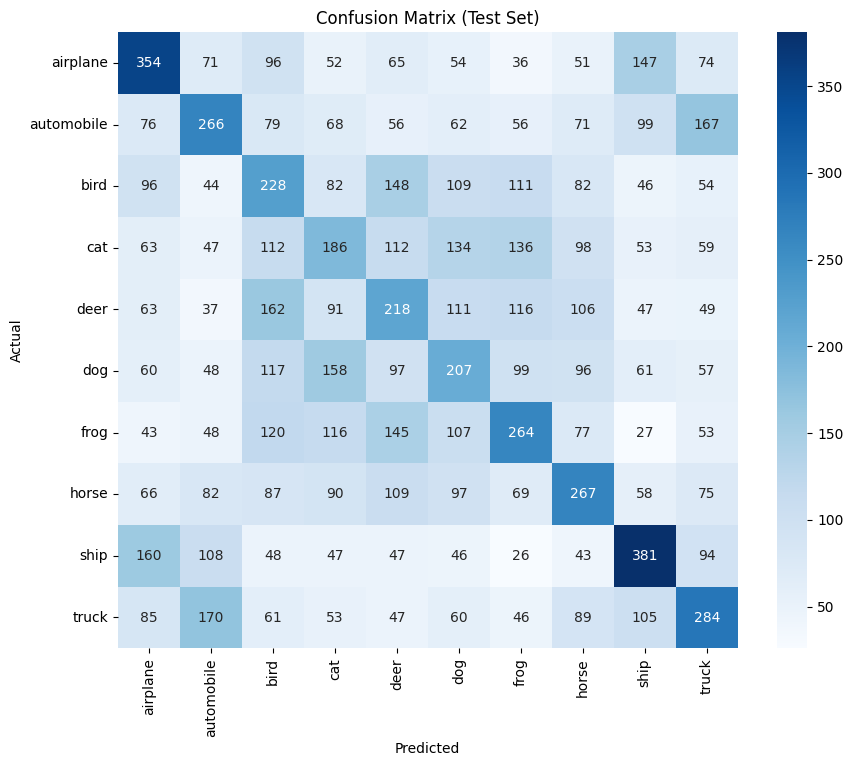

Classification Report:
              precision    recall  f1-score   support

    airplane       0.33      0.35      0.34      1000
  automobile       0.29      0.27      0.28      1000
        bird       0.21      0.23      0.22      1000
         cat       0.20      0.19      0.19      1000
        deer       0.21      0.22      0.21      1000
         dog       0.21      0.21      0.21      1000
        frog       0.28      0.26      0.27      1000
       horse       0.27      0.27      0.27      1000
        ship       0.37      0.38      0.38      1000
       truck       0.29      0.28      0.29      1000

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Flatten images for decision tree
train_images_flatten = train_images.reshape(train_images.shape[0], -1)
test_images_flatten = test_images.reshape(test_images.shape[0], -1)

# Standardize data
scaler = StandardScaler()
train_images_flatten_scaled = scaler.fit_transform(train_images_flatten)
test_images_flatten_scaled = scaler.transform(test_images_flatten)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(train_images_flatten_scaled, train_labels.flatten())

# Evaluate on the test set
y_pred_test = dt_classifier.predict(test_images_flatten_scaled)

# Calculate accuracy
accuracy_test = accuracy_score(test_labels.flatten(), y_pred_test)
print(f'Test Accuracy: {accuracy_test:.4f}')

# Get class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Confusion Matrix for Test Set
cm_test = confusion_matrix(test_labels.flatten(), y_pred_test)

# Plot Confusion Matrix for Test Set
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report (Precision, Recall, F1-Score) for Test Set
print("Classification Report:")
print(classification_report(test_labels.flatten(), y_pred_test, target_names=class_names))


Test Accuracy: 0.4663


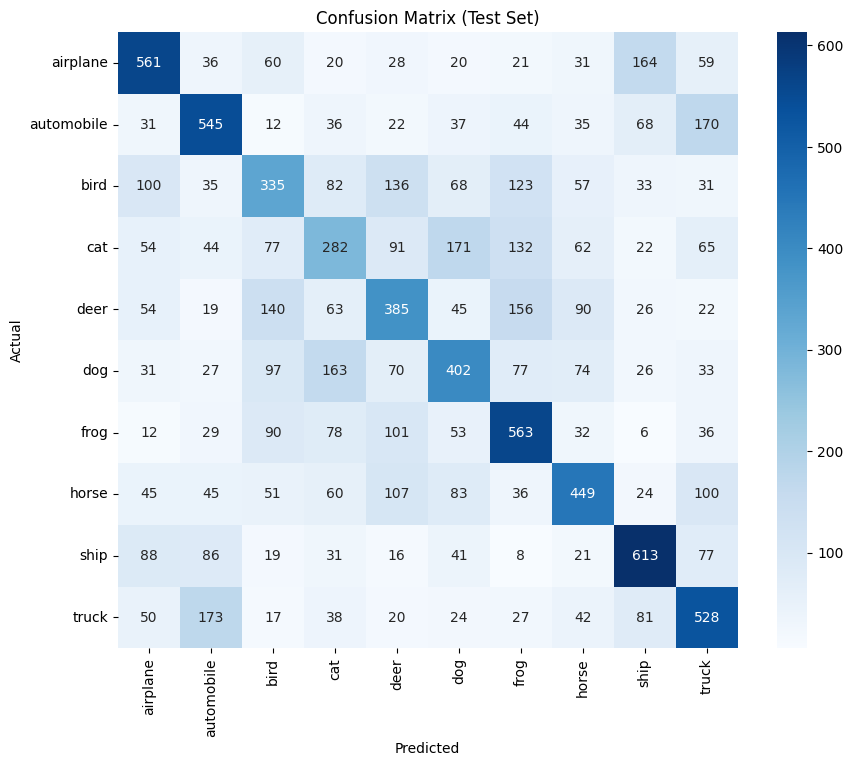

Classification Report:
              precision    recall  f1-score   support

    airplane       0.55      0.56      0.55      1000
  automobile       0.52      0.55      0.53      1000
        bird       0.37      0.34      0.35      1000
         cat       0.33      0.28      0.30      1000
        deer       0.39      0.39      0.39      1000
         dog       0.43      0.40      0.41      1000
        frog       0.47      0.56      0.51      1000
       horse       0.50      0.45      0.47      1000
        ship       0.58      0.61      0.59      1000
       truck       0.47      0.53      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.46     10000
weighted avg       0.46      0.47      0.46     10000



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Flatten images for random forest
train_images_flatten = train_images.reshape(train_images.shape[0], -1)
test_images_flatten = test_images.reshape(test_images.shape[0], -1)

# Standardize data
scaler = StandardScaler()
train_images_flatten_scaled = scaler.fit_transform(train_images_flatten)
test_images_flatten_scaled = scaler.transform(test_images_flatten)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_images_flatten_scaled, train_labels.flatten())

# Evaluate on the test set
y_pred_test = rf_classifier.predict(test_images_flatten_scaled)

# Calculate accuracy
accuracy_test = accuracy_score(test_labels.flatten(), y_pred_test)
print(f'Test Accuracy: {accuracy_test:.4f}')

# Get class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Confusion Matrix for Test Set
cm_test = confusion_matrix(test_labels.flatten(), y_pred_test)

# Plot Confusion Matrix for Test Set
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report (Precision, Recall, F1-Score) for Test Set
print("Classification Report:")
print(classification_report(test_labels.flatten(), y_pred_test, target_names=class_names))


Test Accuracy: 0.2976


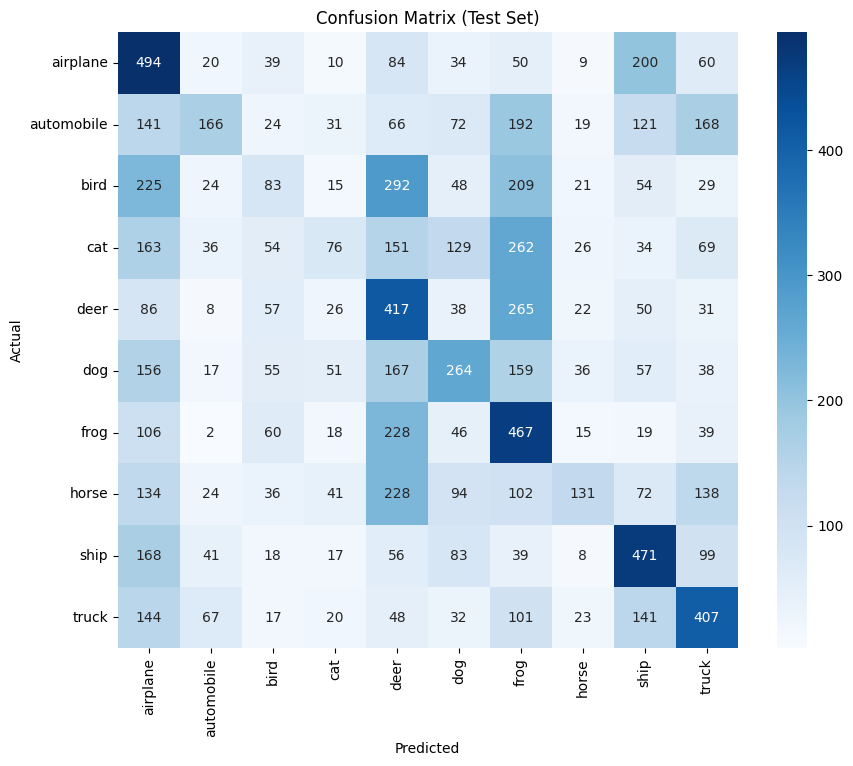

Classification Report:
              precision    recall  f1-score   support

    airplane       0.27      0.49      0.35      1000
  automobile       0.41      0.17      0.24      1000
        bird       0.19      0.08      0.12      1000
         cat       0.25      0.08      0.12      1000
        deer       0.24      0.42      0.30      1000
         dog       0.31      0.26      0.29      1000
        frog       0.25      0.47      0.33      1000
       horse       0.42      0.13      0.20      1000
        ship       0.39      0.47      0.42      1000
       truck       0.38      0.41      0.39      1000

    accuracy                           0.30     10000
   macro avg       0.31      0.30      0.28     10000
weighted avg       0.31      0.30      0.28     10000



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Flatten images for Naive Bayes
train_images_flatten = train_images.reshape(train_images.shape[0], -1)
test_images_flatten = test_images.reshape(test_images.shape[0], -1)

# Standardize data
scaler = StandardScaler()
train_images_flatten_scaled = scaler.fit_transform(train_images_flatten)
test_images_flatten_scaled = scaler.transform(test_images_flatten)

# Naive Bayes Classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()
nb_classifier.fit(train_images_flatten_scaled, train_labels.flatten())

# Evaluate on the test set
y_pred_test = nb_classifier.predict(test_images_flatten_scaled)

# Calculate accuracy
accuracy_test = accuracy_score(test_labels.flatten(), y_pred_test)
print(f'Test Accuracy: {accuracy_test:.4f}')

# Get class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Confusion Matrix for Test Set
cm_test = confusion_matrix(test_labels.flatten(), y_pred_test)

# Plot Confusion Matrix for Test Set
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report (Precision, Recall, F1-Score) for Test Set
print("Classification Report:")
print(classification_report(test_labels.flatten(), y_pred_test, target_names=class_names))


Epoch 1/100
313/313 [==============================] - 8s 10ms/step - loss: 1.7390 - accuracy: 0.3616 - val_loss: 1.4722 - val_accuracy: 0.4595
Epoch 2/100
313/313 [==============================] - 2s 6ms/step - loss: 1.3770 - accuracy: 0.5043 - val_loss: 1.2728 - val_accuracy: 0.5482
Epoch 3/100
313/313 [==============================] - 2s 8ms/step - loss: 1.2305 - accuracy: 0.5618 - val_loss: 1.1776 - val_accuracy: 0.5902
Epoch 4/100
313/313 [==============================] - 2s 7ms/step - loss: 1.1274 - accuracy: 0.6015 - val_loss: 1.1380 - val_accuracy: 0.5984
Epoch 5/100
313/313 [==============================] - 2s 6ms/step - loss: 1.0462 - accuracy: 0.6316 - val_loss: 1.0649 - val_accuracy: 0.6288
Epoch 6/100
313/313 [==============================] - 2s 6ms/step - loss: 0.9893 - accuracy: 0.6520 - val_loss: 1.0512 - val_accuracy: 0.6367
Epoch 7/100
313/313 [==============================] - 2s 6ms/step - loss: 0.9329 - accuracy: 0.6733 - val_loss: 0.9969 - val_accuracy: 0.657

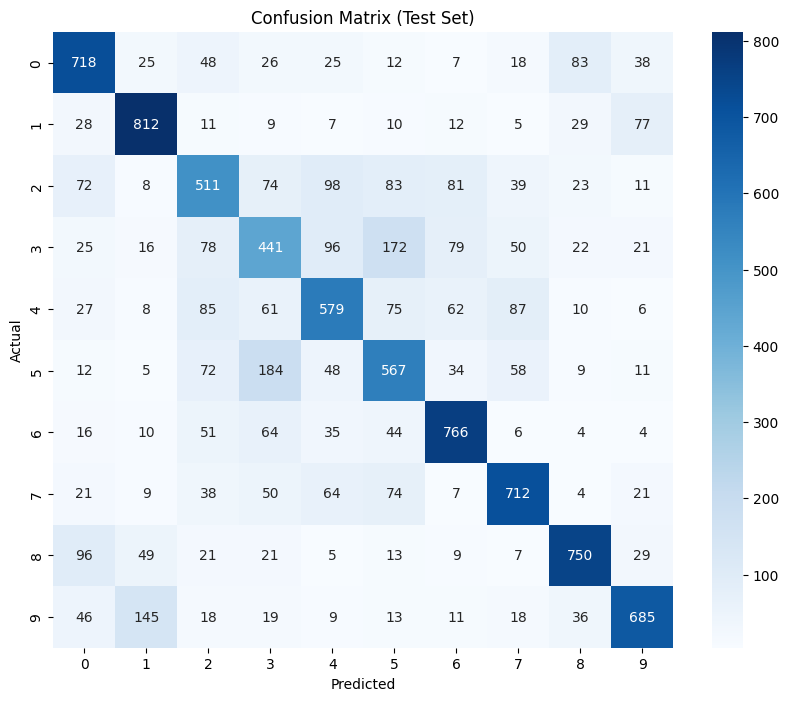

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1000
           1       0.75      0.81      0.78      1000
           2       0.55      0.51      0.53      1000
           3       0.46      0.44      0.45      1000
           4       0.60      0.58      0.59      1000
           5       0.53      0.57      0.55      1000
           6       0.72      0.77      0.74      1000
           7       0.71      0.71      0.71      1000
           8       0.77      0.75      0.76      1000
           9       0.76      0.69      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



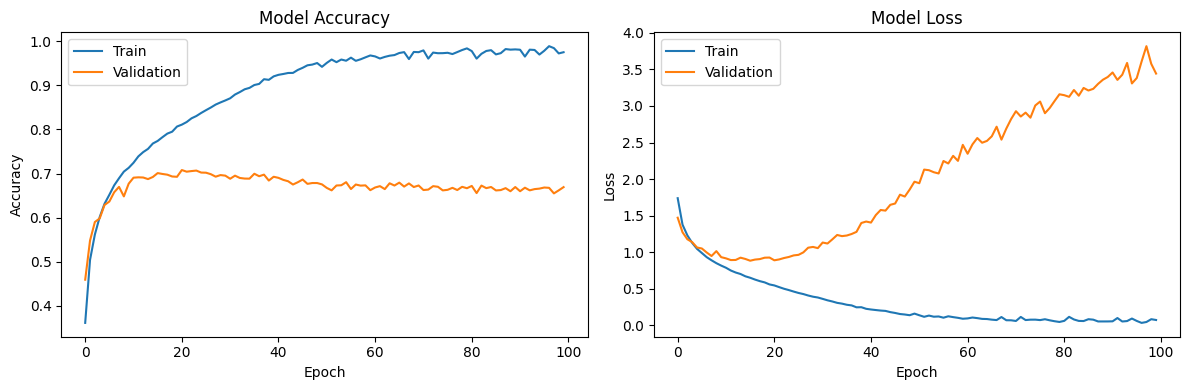

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model with validation split
history = model.fit(train_images, train_labels, epochs=100, batch_size=128, validation_split=0.2)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Loss: {test_loss:.4f}')

# Make predictions on the test set
y_pred_test_probs = model.predict(test_images)
y_pred_test = tf.argmax(y_pred_test_probs, axis=1)

# Confusion Matrix for Test Set
cm_test = confusion_matrix(test_labels, y_pred_test)

# Plot Confusion Matrix for Test Set
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report (Precision, Recall, F1-Score) for Test Set
print("Classification Report:")
print(classification_report(test_labels, y_pred_test, target_names=[str(i) for i in range(10)]))

# Plot Accuracy and Loss Curves
plt.figure(figsize=(12, 4))

# Plot Accuracy Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
